In [68]:
using Pkg
Pkg.activate(".")
Pkg.add(["BenchmarkTools","Plots"])

using BenchmarkTools
using Plots

  Activating project at `~/Desktop/term/explorations`
   Resolving package versions...
    Updating `~/Desktop/term/explorations/Project.toml`
  [91a5bcdd] + Plots v1.38.14
    Updating `~/Desktop/term/explorations/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [944b1d66] + CodecZlib v0.7.1
  [35d6a980] + ColorSchemes v3.21.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.10
  [5ae59095] + Colors v0.12.10
  [34da2185] + Compat v4.6.1
  [f0e56b4a] + ConcurrentUtilities v2.2.0
  [187b0558] + ConstructionBase v1.5.2
  [d38c429a] + Contour v0.6.2
  [9a962f9c] + DataAPI v1.15.0
  [864edb3b] + DataStructures v0.18.13
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensions v0.9.3
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.72.7
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.9.6
  [92d709cd] + IrrationalConstants v0.2.2
  [1019f520] + JLFzf v0.1.5
  [692b3bcd] + JLLWrappe

In [1]:
x = rand(5)

5-element Vector{Float64}:
 0.5273147238239101
 0.42209526437632916
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [2]:
y = x

5-element Vector{Float64}:
 0.5273147238239101
 0.42209526437632916
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [3]:
y[1]=1.0

1.0

In [4]:
x

5-element Vector{Float64}:
 1.0
 0.42209526437632916
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [13]:
z = copy(x)

5-element Vector{Float64}:
 1.0
 0.42209526437632916
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [7]:
z[2] = 0.0

0.0

In [8]:
x

5-element Vector{Float64}:
 1.0
 0.42209526437632916
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [9]:
z

5-element Vector{Float64}:
 1.0
 0.0
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [10]:
y

5-element Vector{Float64}:
 1.0
 0.42209526437632916
 0.4695262123684518
 0.904984630310024
 0.10954853358803751

In [11]:
x === y

true

In [14]:
x == z

true

In [15]:
x === z

false

In [16]:
[[1]]

1-element Vector{Vector{Int64}}:
 [1]

In [80]:
grid = rand([0,1],8,8)

8×8 Matrix{Int64}:
 1  1  0  0  0  0  0  1
 1  1  0  0  1  1  0  1
 0  1  0  1  0  1  0  1
 0  1  0  0  1  0  1  1
 0  1  1  1  0  1  1  0
 1  0  0  0  0  1  0  0
 1  1  0  1  1  0  0  0
 1  1  1  1  1  1  1  1

In [79]:
?rand

search: rand randn transcode @shorthands macroexpand @macroexpand @macroexpand1



```
rand([rng=default_rng()], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and dense `BitSet`s. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.



In [31]:
s⃗ = vec(grid)

64-element Vector{Int64}:
 0
 0
 1
 0
 0
 1
 0
 0
 1
 0
 1
 1
 1
 ⋮
 0
 0
 1
 0
 0
 0
 0
 0
 1
 1
 0
 0

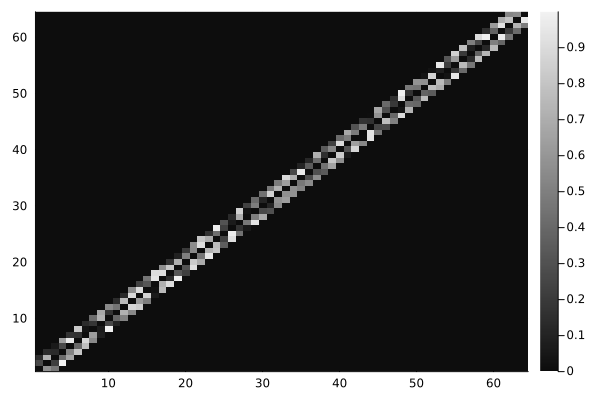

In [70]:
N = length(s⃗)
Λ = zeros(N,N)
for i in 1:N
    for j in 1:N
        if j == i+1 Λ[i,j] = rand() end
        if j+1 == i Λ[i,j] = rand() end
        if j == i+2 Λ[i,j] = rand() end
        if j+2 == i Λ[i,j] = rand() end
    end
end

heatmap(Λ,c=:grays)

In [71]:
Λprime = Λ .* ( ones(64) * s⃗' )

64×64 Matrix{Float64}:
 0.0  0.0  0.461566   0.0  0.0  …  0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.218994   0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.126788   0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0583352  0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0  …  0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0  …  0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 0.0  0.0  0.0        0.0  0.0     0.0  0.0       0.0       0.0  0.0
 ⋮                              ⋱       ⋮                        
 0.0  0.0  0.0

In [50]:
@benchmark ones($N,$N) - $Λprime

BenchmarkTools.Trial: 10000 samples with 6 evaluations.
 Range (min … max):   4.997 μs …  1.239 ms  ┊ GC (min … max):  0.00% … 98.14%
 Time  (median):     10.450 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   17.065 μs ± 73.571 μs  ┊ GC (mean ± σ):  38.56% ±  8.97%

  ▇▅▃▂▁▁▁▇█▄▃▁▁▁▁▂▁                                           ▂
  ██████████████████▇▇▇▆▆▄▅▆▂▄▄▅▂▃▄▂▅▄▄▄▄▄▄▅▄▅▇█▇▇▇▇▇▇▆▆▅▄▅▃▄ █
  5 μs         Histogram: log(frequency) by time      45.3 μs <

 Memory estimate: 64.09 KiB, allocs estimate: 4.

In [51]:
@benchmark 1 .- $Λprime

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  2.570 μs … 656.963 μs  ┊ GC (min … max):  0.00% … 98.62%
 Time  (median):     4.990 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   7.701 μs ±  39.467 μs  ┊ GC (mean ± σ):  39.98% ±  7.81%

  ▆▇▅▃▂▂▁▁▁▂█▇▃▃▂▂▂▁▁▂▁    ▁                                  ▂
  ██████████████████████████████▇▇▇▆▄▆▆▇▄▆▄▆▆▅▅▄▅▄▅▅▃▄▅▄▄▃▁▄▄ █
  2.57 μs      Histogram: log(frequency) by time      16.1 μs <

 Memory estimate: 32.05 KiB, allocs estimate: 2.

In [52]:
@benchmark ones($N,$N) .- $Λprime

BenchmarkTools.Trial: 10000 samples with 6 evaluations.
 Range (min … max):   4.911 μs …  1.053 ms  ┊ GC (min … max):  0.00% … 98.63%
 Time  (median):     10.120 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   16.001 μs ± 72.350 μs  ┊ GC (mean ± σ):  41.08% ±  9.00%

  ▆▅▂▁  ▁ ▅█▃▂▁▁▂ ▁▁▁                                         ▂
  ████████████████████▇▇▇▆▆▆▆▅▅▅▅▄▅▅▄▄▄▄▁▄▁▁▃▃▁▃▁▃▃▃▃▃▄▄▅▄▅▅▅ █
  4.91 μs      Histogram: log(frequency) by time      38.4 μs <

 Memory estimate: 64.09 KiB, allocs estimate: 4.

In [72]:
Λprime = Λ .* ( ones(64) * s⃗' )
Λs = 1 .- Λprime
p⃗ = 1 .- prod(Λs, dims=2)
s⃗ = map((x,p) -> (x==1) ? x : ( (rand()<p) ? one(x) : zero(x) ), s⃗,p⃗)

64×1 Matrix{Float64}:
 0.46156574444141507
 0.2189935474681649
 0.0
 0.8325743420871542
 0.42918715110163064
 0.0
 0.223751718390641
 0.8298007904947033
 0.09099262977197498
 0.9155734923068177
 0.9578266744096243
 0.9324346013215691
 0.8905087684527616
 ⋮
 0.9516206654999905
 0.18675670338229833
 0.0
 0.6181429597738368
 0.857001825550515
 0.0
 0.38573300140992606
 0.9832383636435358
 0.19532641500964187
 0.9347174620281067
 0.9380174283685996
 0.5283203329469276

In [59]:
(x,p) -> (x==1) ? x : ( (rand()<p) ? one(x) : zero(x) )

#3 (generic function with 1 method)

In [73]:
s⃗ = map((x,p) -> (x==1) ? x : ( (rand()<p) ? one(x) : zero(x) ), s⃗,p⃗)

64-element Vector{Int64}:
 0
 0
 1
 1
 0
 1
 0
 1
 1
 1
 1
 1
 1
 ⋮
 1
 0
 1
 1
 1
 0
 0
 1
 1
 1
 1
 0

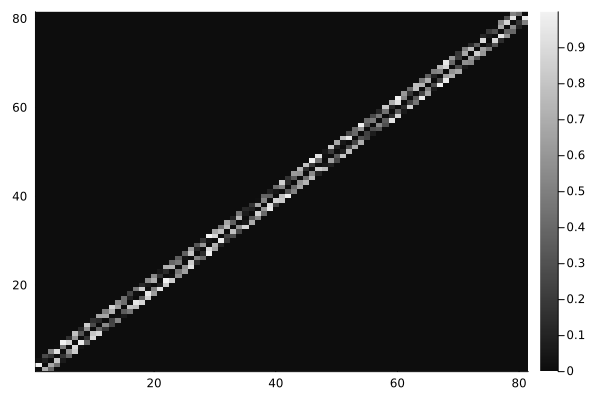

In [88]:
## Initialize
## function initialize(L::Int=8,mode::Symbol=:default)
##
## s⃗ = initialize()
##
L = 9 #< input
grid = zeros(Int,L,L)

if mode=:center
end

if mode=:default
    grid[1,1] = 1
    grid[L,L] = 1
    grid[1,L] = 1
    grid[L,1] = 1
end

s⃗ = vec(grid)
display(grid)
display(s⃗);

## Generating ar
N = length(s⃗)
Λ = zeros(N,N) #<<<INPUT

λMatrix = [
    λ[1] 
]

for i in 1:N
    for j in 1:N
        if j == i+1 Λ[i,j] = λMatrix[] end
        if j+1 == i Λ[i,j] = rand() end
        if j == i+2 Λ[i,j] = rand() end
        if j+2 == i Λ[i,j] = rand() end
    end
end

heatmap(Λ,c=:grays)

In [91]:
Λprime = Λ .* ( ones(size(s⃗)) * s⃗' )
Λs = 1 .- Λprime
p⃗ = 1 .- prod(Λs, dims=2)
s⃗ = map((x,p) -> (x==1) ? x : ( (rand()<p) ? one(x) : zero(x) ), s⃗,p⃗)

81-element Vector{Int64}:
 1
 1
 0
 0
 0
 0
 0
 1
 1
 0
 1
 0
 1
 ⋮
 1
 1
 1
 1
 1
 1
 0
 0
 0
 0
 1
 1